In [143]:
#import needed packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np

In [144]:
#Merge 12 months of sales data into single file
files = [file for file in os.listdir('./Sales')]

print(files)

df = pd.concat((pd.read_csv(r'./Sales/' + file) for file in files), ignore_index = True)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [145]:
#inspect the data frame
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [146]:
#drop rows with null values and set index
df.dropna(axis = 0, inplace = True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [147]:
#drop rows with column headers as values
df.drop(df.index[df['Order ID'] == 'Order ID'], axis = 0, inplace = True)

In [148]:
#convert columns to desired data types
df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric)

df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%y %H:%M')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [149]:
#Find the month with the highest sales
df['sale_amount'] = df['Quantity Ordered'] * df['Price Each']

monthly_sales = df.groupby(df['Order Date'].dt.month)['sale_amount'].sum().reset_index().set_index('Order Date')

monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%m').month_name().str[:3]

monthly_sales.sort_values(by = 'sale_amount', ascending = False)

,sale_amount
Order Date,
Dec,4613443.34
Oct,3736726.88
Apr,3390670.24
Nov,3199603.20
May,3152606.75
Mar,2807100.38
Jul,2647775.76
Jun,2577802.26
Aug,2244467.88


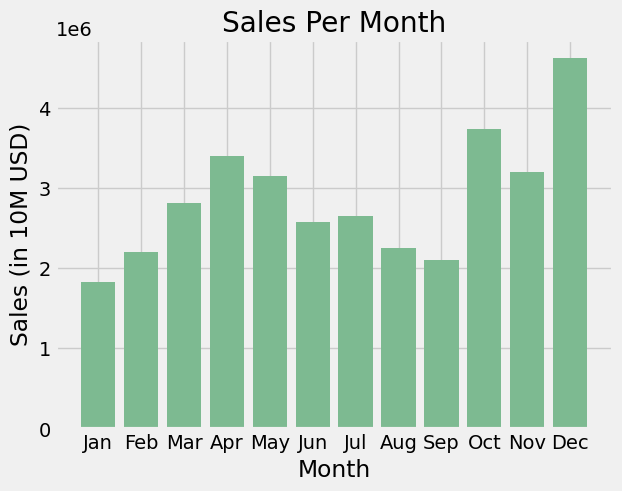

In [150]:
# plot the monthly sales
monthly_sales_plot = plt.bar(monthly_sales.index, monthly_sales['sale_amount'])
plt.xticks(monthly_sales.index)
plt.xlabel('Month')
plt.ylabel('Sales (in 10M USD)')
plt.title('Sales Per Month')
plt.show()

In [151]:
#create columns for elements of address
df['zip_code'] = df['Purchase Address'].str.split(' ').str[-1].str.strip()
df['state'] = df['Purchase Address'].str.split(' ').str[-2].str.strip()
df['city'] = df['Purchase Address'].str.split(',').str[-2].str.strip() + ', ' + df['state']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale_amount,zip_code,state,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,75001,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,02215,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,90001,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,90001,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,90001,CA,"Los Angeles, CA"


In [152]:
#What city had the highest numebr of sales
city_sales = df.groupby('city')['sale_amount'].sum().reset_index().sort_values(by = 'sale_amount', ascending = False)
city_sales

,city,sale_amount
8,"San Francisco, CA",8262203.91
4,"Los Angeles, CA",5452570.80
5,"New York City, NY",4664317.43
2,"Boston, MA",3661642.01
0,"Atlanta, GA",2795498.58
3,"Dallas, TX",2767975.40
9,"Seattle, WA",2747755.48
7,"Portland, OR",1870732.34
1,"Austin, TX",1819581.75
6,"Portland, ME",449758.27


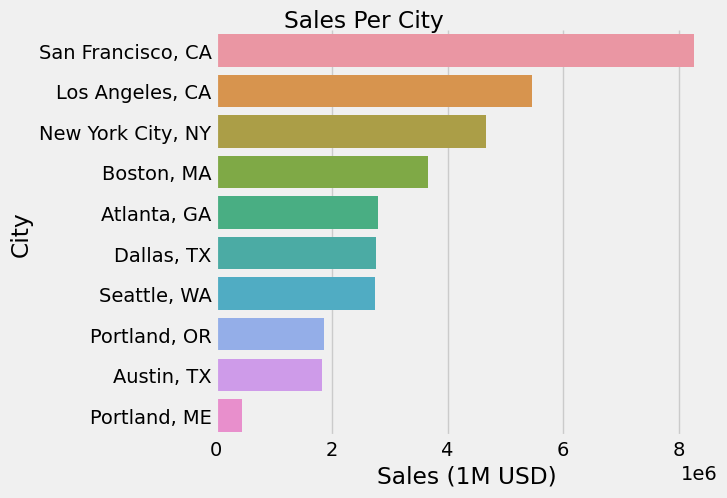

In [153]:
#plot the city sales
city_plot = sns.catplot(city_sales, y = 'city', x = 'sale_amount', kind = 'bar', height = 5, aspect = 1.5)
city_plot.set_axis_labels(x_var = 'Sales (1M USD)', y_var = 'City')
city_plot.fig.suptitle('Sales Per City', y = 1)

plt.show()

In [154]:
#When should we advertise to maximize sales?
hour_data = df.groupby(df['Order Date'].dt.hour)['sale_amount'].sum().reset_index().rename(columns = {'Order Date':'hour', 'sale_amount':'total_sales'})
hour_data

,hour,total_sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


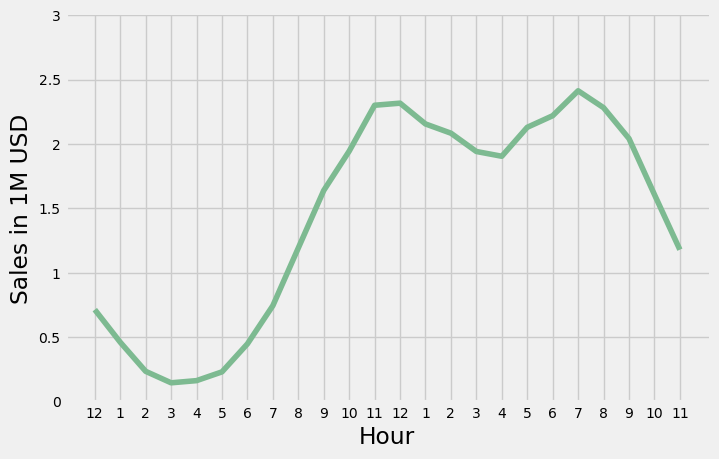

In [164]:
hour_plot = sns.relplot(data = hour_data, x = 'hour', y = 'total_sales', kind = 'line', aspect = 1.5)
plt.xticks(np.arange(0, 24))
hour_plot.set_xticklabels([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], size = 10)
hour_plot.set_yticklabels([0, .5, 1, 1.5, 2, 2.5, 3], size = 10)
hour_plot.set_axis_labels(x_var = 'Hour', y_var = 'Sales in 1M USD')
plt.show()

In [156]:
#What products are most often sold together?
grouped_products = df[['Order ID', 'Product']].merge(df[['Order ID', 'Product']], on = 'Order ID')
grouped_products.drop(grouped_products.index[grouped_products['Product_x'] == grouped_products['Product_y']], axis = 0, inplace = True)
grouped_products.drop_duplicates(subset = 'Order ID', inplace = True)
grouped_counts = grouped_products.groupby(['Product_x', 'Product_y']).count().rename(columns = {'Order ID':'order_counts'})
grouped_counts = grouped_counts.sort_values(by = 'order_counts', ascending = False).drop_duplicates().reset_index()
grouped_counts.head()

,Product_x,Product_y,order_counts
0,iPhone,Lightning Charging Cable,1001
1,Google Phone,USB-C Charging Cable,984
2,iPhone,Wired Headphones,362
3,Vareebadd Phone,USB-C Charging Cable,361
4,iPhone,Apple Airpods Headphones,313


In [157]:
#Prepare grouped_counts for heatmap
grouped_counts = grouped_counts.pivot_table(index = 'Product_x', columns = 'Product_y', values = 'order_counts').fillna(0)

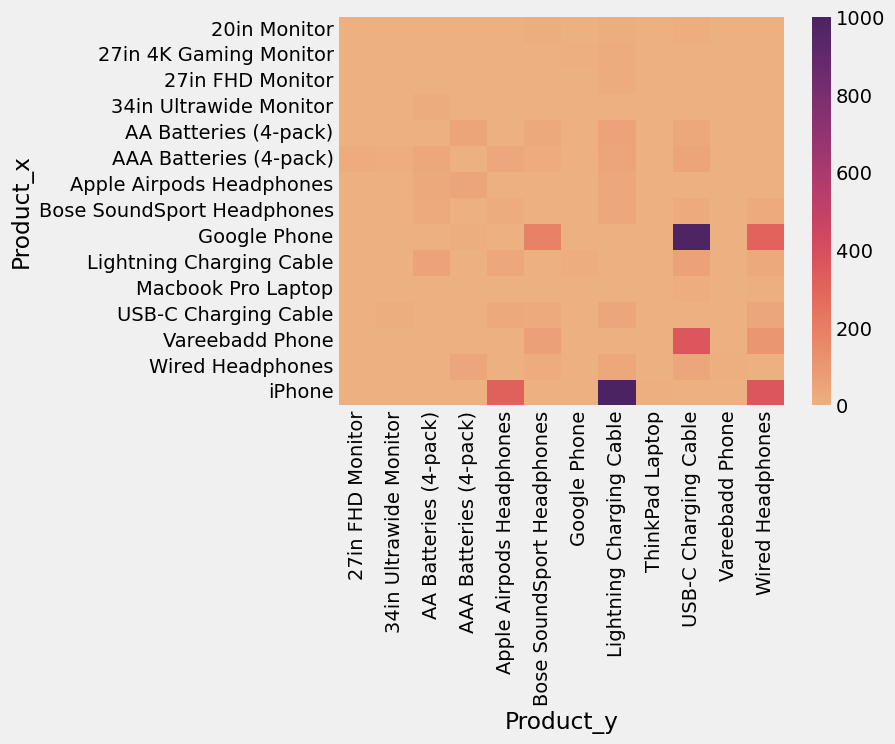

In [158]:
#plot the product combinations
grouped_product_plot = sns.heatmap(grouped_counts, cmap = 'flare')
plt.show()

In [159]:
#What product sold the most?
product_counts = df.groupby(df['Product'])['Quantity Ordered'].count().reset_index().sort_values(by = 'Quantity Ordered', ascending = False)
product_counts.head()

,Product,Quantity Ordered
15,USB-C Charging Cable,21903
12,Lightning Charging Cable,21658
5,AAA Batteries (4-pack),20641
4,AA Batteries (4-pack),20577
17,Wired Headphones,18882


In [167]:
#find the average price of each product
avg_price = df.groupby('Product')['Price Each'].mean().reset_index()
avg_price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


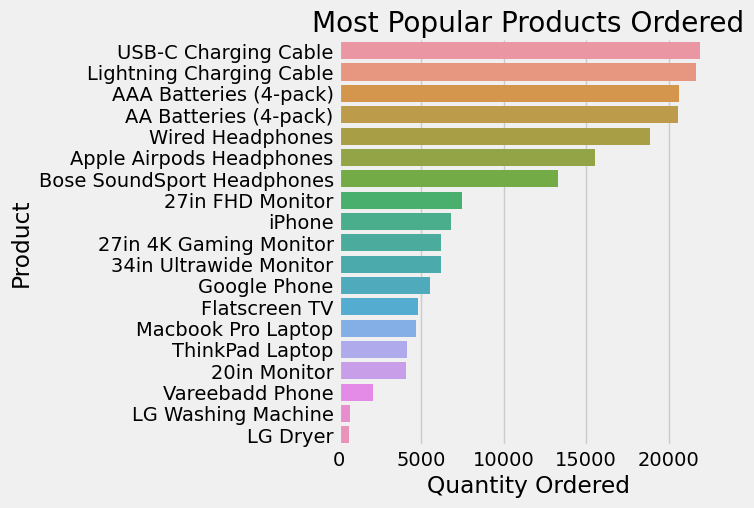

In [200]:
#plot the products ordered
products_plot = sns.catplot(price_quantity, 
                            y = 'Product', 
                            x = 'Quantity Ordered', 
                            kind = 'bar', 
                           aspect = 1.5)
products_plot.set_yticklabels()
products_plot.set(title = 'Most Popular Products Ordered')
plt.show()

In [199]:
#combine price and quanity dfs
price_quantity = avg_price.merge(product_counts, on = 'Product').sort_values(by = 'Quantity Ordered', ascending = False)
price_quantity.head()

,Product,Price Each,Quantity Ordered
15,USB-C Charging Cable,11.95,21903
12,Lightning Charging Cable,14.95,21658
5,AAA Batteries (4-pack),2.99,20641
4,AA Batteries (4-pack),3.84,20577
17,Wired Headphones,11.99,18882


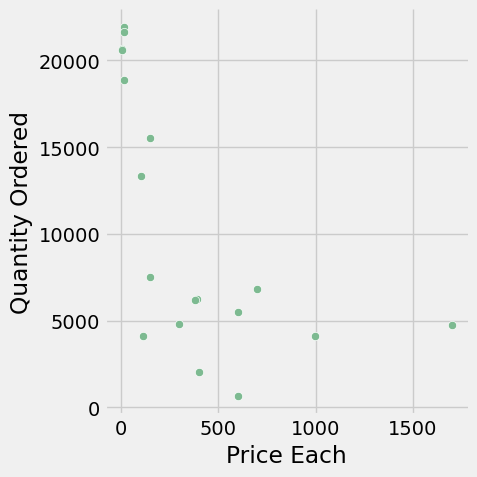

In [205]:
#plot the relation between unit price and quantity ordered
price_quantity_plot = sns.relplot(price_quantity, x = 'Price Each', y = 'Quantity Ordered')
plt.show()